In [1]:
%matplotlib inline

<img src="imgs/tensorflow_head.png" />

# Tensorflow

>**TensorFlow** (https://www.tensorflow.org/) is a software library, developed by Google Brain Team within Google's Machine Learning Intelligence research organization, for the purposes of conducting machine learning and deep neural network research. 

>TensorFlow combines the computational algebra of compilation optimization techniques, making easy the calculation of many mathematical expressions that would be difficult to calculate, instead.



## Tensorflow Main Features

* Defining, optimizing, and efficiently calculating mathematical expressions involving multi-dimensional arrays (tensors).

* Programming support of **deep neural networks** and machine learning techniques.

* Transparent use of GPU computing, automating management and optimization of the same memory and the data used. You can write the same code and run it either on CPUs or GPUs. More specifically, TensorFlow will figure out which parts of the computation should be moved to the GPU.

* High scalability of computation across machines and huge data sets.


>TensorFlow is available with Python and C++ support, but the **Python API** is better supported and much easier to learn.

# Very Preliminary Example

In [2]:
# A simple calculation in Python
x = 1
y = x + 10
print(y)

11


In [3]:
import tensorflow as tf

In [4]:
# The ~same simple calculation in Tensorflow
x = tf.constant(1, name='x')
y = tf.Variable(x+10, name='y')
print(y)

**Meaning**: "When the variable `y` is computed, take the value of the constant `x` and add `10` to it"

## Sessions and Models

To actually calculate the value of the `y` variable and to evaluate expressions, we need to **initialise** the variables, and then create a **session** where the actual computation happens

In [5]:
model = tf.initialize_all_variables()  # model is used by convention

In [6]:
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

11


## Data Flow Graph

* (**IDEA**) 
_A Machine Learning application is the result of the repeated computation of complex mathematical expressions, thus 
we could describe this computation by using a **Data Flow Graph**

* **Data Flow Graph**: a graph where:
    - each Node represents the _instance_ of a mathematical operation 
        - `multiply`, `add`, `divide`
    - each Edge is a multi-dimensional data set (`tensors`) on which the operations are performed.

## Tensorflow Graph Model

* **Node**: In TensorFlow, each node represents the instantion of an operation. 
    - Each operation has inputs (`>= 2`) and outputs `>= 0`.
    
* **Edges**: In TensorFlow, there are two types of edge:
    - Data Edges: 
    They are carriers of data structures (`tensors`), where an output of one operation (from one node) becomes the input for another operation.
    - Dependency Edges: These edges indicate a _control dependency_ between two nodes (i.e. "happens before" relationship). 
        + Let's suppose we have two nodes `A` and `B` and a dependency edge connecting `A` to `B`. This means that `B` will start its operation only when the operation in `A` ends. 

## Tensorflow Graph Model (cont.)

* **Operation**: This represents an abstract computation, such as adding or multiplying matrices. 
    - An operation manages tensors, and It can just be polymorphic: the same operation can manipulate different tensor element types. 
        + For example, the addition of two int32 tensors, the addition of two float tensors, and so on.

* **Kernel**: This represents the concrete implementation of that operation. 
    - A kernel defines the implementation of the operation on a particular device. 
        + For example, an `add matrix` operation can have a CPU implementation and a GPU one.

## Tensorflow Graph Model Session

**Session**: When the client program has to establish communication with the TensorFlow runtime system, a session must be created. 
    
As soon as the session is created for a client, an initial graph is created and is empty. It has two fundamental methods:

* `session.extend`: To be used during a computation, requesting to add more operations (nodes) and edges (data). The execution graph is then extended accordingly.

* `session.run`: The execution graphs are executed to get the outputs (sometimes, subgraphs are executed thousands/millions of times using run invocations).

# Tensorboard

**TensorBoard** is a visualization tool, devoted to analyzing Data Flow Graph and also to better understand the machine learning models. 

It can view different types of statistics about the parameters and details of any part of a computer graph graphically. It often happens that a graph of computation can be very complex.

## Tensorboard Example

In [7]:
a = tf.constant(5, name="a")
b = tf.constant(45, name="b")
y = tf.Variable(a+b*2, name='y')
model = tf.initialize_all_variables()

with tf.Session() as session:
    # Merge all the summaries collected in the default graph.
    merged = tf.merge_all_summaries()  
    
    # Then we create `SummaryWriter`. 
    # It will write all the summaries (in this case the execution graph) 
    # obtained from the code's execution into the specified path”
    writer = tf.train.SummaryWriter("/tmp/tf_logs", session.graph)
    session.run(model)
    print(session.run(y))

95


Now we run the **TensorBoard** Server:

```shell
tensorboard --logdir=/tmp/tf_logs
```

[Open TensorBoard](http://localhost:6006)

# Data Types (Tensors)

## One Dimensional Tensor (Vector)

In [8]:
import numpy as np
tensor_1d = np.array([1, 2.5, 4.6, 5.75, 9.7])
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

In [9]:
with tf.Session() as sess: 
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[ 1.    2.5   4.6   5.75  9.7 ]
1.0
4.6


## Two Dimensional Tensor (Matrix)

In [10]:
tensor_2d = np.arange(16).reshape(4, 4)
print(tensor_2d)
tf_tensor = tf.placeholder(tf.float32, shape=(4, 4))
with tf.Session() as sess:
    print(sess.run(tf_tensor, feed_dict={tf_tensor: tensor_2d}))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


# Basic Operations (Examples)

In [11]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='float32') 
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='float32')

In [12]:
tf_mat1 = tf.constant(matrix1) 
tf_mat2 = tf.constant(matrix2)

In [13]:
matrix_product = tf.matmul(tf_mat1, tf_mat2)
matrix_sum = tf.add(tf_mat1, tf_mat2)

In [14]:
matrix_det = tf.matrix_determinant(matrix2)

In [15]:
with tf.Session() as sess: 
    prod_res = sess.run(matrix_product) 
    sum_res = sess.run(matrix_sum) 
    det_res = sess.run(matrix_det)

In [16]:
print("matrix1*matrix2 : \n", prod_res)
print("matrix1+matrix2 : \n", sum_res)
print("det(matrix2) : \n", det_res)

matrix1*matrix2 : 
 [[ 6.  6.  6.]
 [ 6.  6.  6.]
 [ 6.  6.  6.]]
matrix1+matrix2 : 
 [[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
det(matrix2) : 
 0.0


# Handling Tensors

In [17]:
import matplotlib.image as mp_image
filename = "imgs/keras-logo-small.jpg"
input_image = mp_image.imread(filename)

In [18]:
#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (300, 300, 3)


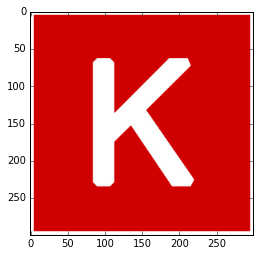

In [19]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

### Slicing

In [20]:
my_image = tf.placeholder("uint8",[None,None,3])
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])

In [21]:
with tf.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)

(16, 300, 3)


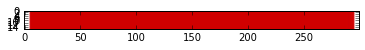

In [22]:
plt.imshow(result)
plt.show()

## Transpose

In [23]:
x = tf.Variable(input_image,name='x')
model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

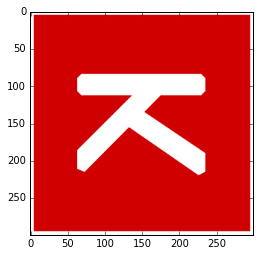

In [24]:
plt.imshow(result)
plt.show()

## Computing the Gradient

- Gradients are free!

In [25]:
x = tf.placeholder(tf.float32)
y = tf.log(x)   
var_grad = tf.gradients(y, x)
with tf.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={x:2})
    print(var_grad_val)

[0.5]


# Warming up: Logistic Regression

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

## MNIST Dataset

The MNIST dataset (available at http://yann.lecun.com/exdb/mnist/), is widely used for training and testing in the field of machine learning, and we will use it in the examples of this book. It contains black and white images of handwritten digits from 0 to 9.

The data set is divided into two groups: 60,000 to train the model and an additional 10,000 to test it. The original images, in black and white, were normalized to fit into a box of size 28×28 pixels and centered by calculating the center of mass of the pixels.

![](imgs/mnist.png)

```
%load mnist_data.py
```

(Adapted from [input_data.py](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py))

In [ ]:
%load mnist_data.py


In [28]:
import mnist_data
mnist = mnist_data.read_data_sets("./data/mnist", one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


## Dataset Statistics

In [41]:
print(len(mnist.train.images))
print(len(mnist.validation.images))
print(len(mnist.test.images))

55000
5000
10000


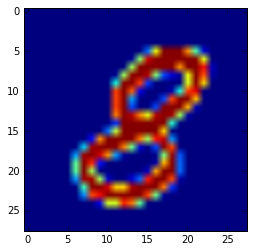

In [29]:
image = mnist.train.images[5, :]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.show()

## Logistic Regression

This algorithm has nothing to do with the canonical linear regression, but it is an algorithm that allows us to solve problems of classification(supervised learning). 

In fact, to estimate the dependent variable, now we make use of the so-called **logistic function** or **sigmoid**. 

It is precisely because of this feature we call this algorithm logistic regression.

![](imgs/sigmoid.png)

#### Hands On - Logistic Regression

In [30]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [31]:
# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

## The Model

In [32]:
# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [33]:
# Construct model
activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

In [34]:
# Minimize error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1))

In [35]:
# Set the Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [36]:
# Initializing the variables
init = tf.initialize_all_variables()

## Learning

In [37]:
def training_phase():
    avg_set, epoch_set = [], []
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys}) / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    return avg_set, epoch_set

## Prediction

In [38]:
def testing_phase():
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

## TF Session

Epoch: 0001 cost= 1.174406640
Epoch: 0002 cost= 0.661971966
Epoch: 0003 cost= 0.550468684
Epoch: 0004 cost= 0.496635278
Epoch: 0005 cost= 0.463640329
Epoch: 0006 cost= 0.440920262
Epoch: 0007 cost= 0.423842325
Epoch: 0008 cost= 0.410577519
Epoch: 0009 cost= 0.399873370
Epoch: 0010 cost= 0.390957368
Epoch: 0011 cost= 0.383292005
Epoch: 0012 cost= 0.376770196
Epoch: 0013 cost= 0.371013354
Epoch: 0014 cost= 0.365943099
Epoch: 0015 cost= 0.361356259
Epoch: 0016 cost= 0.357267829
Epoch: 0017 cost= 0.353508943
Epoch: 0018 cost= 0.350138274
Epoch: 0019 cost= 0.347004299
Epoch: 0020 cost= 0.344122458
Epoch: 0021 cost= 0.341479960
Epoch: 0022 cost= 0.338976050
Epoch: 0023 cost= 0.336658899
Epoch: 0024 cost= 0.334475658
Epoch: 0025 cost= 0.332448471
Training phase finished


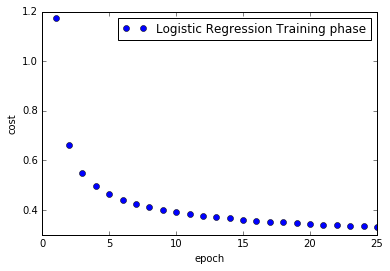

Model accuracy: 0.9144


In [39]:
# Launch the graph
with tf.Session() as sess:
    # Plug TensorBoard Visualisation
    merged = tf.merge_all_summaries() 
    writer = tf.train.SummaryWriter("/tmp/logistic_logs", session.graph)
    
    sess.run(init)
    avg_set, epoch_set = training_phase()
    print("Training phase finished")
    
    #plotting
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    #Testing
    testing_phase()

[Open TensorBoard](http://localhost:6006)

# Why Tensorflow ?

On a typical system, there are multiple computing devices. 

In TensorFlow, the supported device types are **CPU** and **GPU**. 

They are represented as strings. For example:

* `"/cpu:0"`: The CPU of your machine.
* `"/gpu:0"`: The GPU of your machine, if you have one.
* `"/gpu:1"`: The second GPU of your machine, etc.

If a TensorFlow operation has both **CPU** and **GPU** implementations, the GPU devices will be given priority when the operation is assigned to a device. 

For example, `matmul` has both CPU and GPU kernels. On a system with devices `cpu:0` and `gpu:0`, `gpu:0` will be selected to run `matmul`.

### Example 1. Logging Device Placement

`tf.Session(config=tf.ConfigProto(log_device_placement=True))`

```python
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:05:00.0
b: /job:localhost/replica:0/task:0/gpu:0
a: /job:localhost/replica:0/task:0/gpu:0
MatMul: /job:localhost/replica:0/task:0/gpu:0
[[ 22.  28.]
 [ 49.  64.]]
```

## Using Multiple GPUs

```python
# Creates a graph.
c = []
for d in ['/gpu:0', '/gpu:1']:
  with tf.device(d):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c.append(tf.matmul(a, b))
with tf.device('/cpu:0'):
  sum = tf.add_n(c)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print sess.run(sum)
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:02:00.0
/job:localhost/replica:0/task:0/gpu:1 -> device: 1, name: GeForce GTX 760, pci bus
id: 0000:03:00.0
Const_3: /job:localhost/replica:0/task:0/gpu:0
Const_2: /job:localhost/replica:0/task:0/gpu:0
MatMul_1: /job:localhost/replica:0/task:0/gpu:0
Const_1: /job:localhost/replica:0/task:0/gpu:1
Const: /job:localhost/replica:0/task:0/gpu:1
MatMul: /job:localhost/replica:0/task:0/gpu:1
AddN: /job:localhost/replica:0/task:0/cpu:0
[[  44.   56.]
 [  98.  128.]]
```

## More on Tensorflow

[Official Documentation](https://www.tensorflow.org/versions/r0.10/get_started/)